## Librerias a utilizar

In [655]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.feature_selection import f_classif, SelectKBest, f_regression
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso

## Paso 1. Planteamiento del problema y recopilación de datos

El DataSet corresponde a datos socio demográficos y de recursos de salud a nivel de condado de EE. UU. (2018-2019)
Se quiere investigar si existe alguna relación entre los recursos sanitarios y los datos socio demográficos.

Para ello, es necesario que establecer una variable objetivo (relacionada con la salud) para llevar a cabo el análisis. La variable seleccionada es 'anycondition_prevalence', se han tomado como variables predictoras caracteristicas que pertenecen a las categorías: demográficas, educación, socioeconómicas y recursos sanitarios. A continuacion se mencionan las variables:

- Demográficas:  Med_HH_Income_Percent_of_State_Total_2018 (Ingreso medio de los hogares por condado como porcentaje del ingreso medio total de los hogares del estado) y R_death_2018 (tasa de mortalidad 2018). 
- Educación: Percent of adults with a bachelor's degree or higher 2014-18 (Porcentaje de adultos con bachelor's degree o superior).
- Socioeconómicas: Unemployment_rate_2018 (Tasa de desempleo), PCTPOVALL_2018 (Porcentaje de personas en pobreza).
- Recursos sanitarios: Active Primary Care Physicians per 100000 Population 2018 (AAMC)

La selección de estas características son producto de revisar los coeficientes de correlación que presentan con el objetivo a predecir (anycondition_prevalence), de igual manera, como premisa de selección se evitó que las características no presentasen coeficientes de correlación entre si por encima de 0,8 para evitar el fenomeno de multicolinearidad

In [656]:
data_s=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')

In [657]:
data_s.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [658]:
cols=data_s.columns
print(type(cols))
i=0
for col in range(len(cols)):
    print(cols[col])
    i+=1
print(i)

<class 'pandas.core.indexes.base.Index'>
fips
TOT_POP
0-9
0-9 y/o % of total pop
19-Oct
10-19 y/o % of total pop
20-29
20-29 y/o % of total pop
30-39
30-39 y/o % of total pop
40-49
40-49 y/o % of total pop
50-59
50-59 y/o % of total pop
60-69
60-69 y/o % of total pop
70-79
70-79 y/o % of total pop
80+
80+ y/o % of total pop
White-alone pop
% White-alone
Black-alone pop
% Black-alone
Native American/American Indian-alone pop
% NA/AI-alone
Asian-alone pop
% Asian-alone
Hawaiian/Pacific Islander-alone pop
% Hawaiian/PI-alone
Two or more races pop
% Two or more races
POP_ESTIMATE_2018
N_POP_CHG_2018
GQ_ESTIMATES_2018
R_birth_2018
R_death_2018
R_NATURAL_INC_2018
R_INTERNATIONAL_MIG_2018
R_DOMESTIC_MIG_2018
R_NET_MIG_2018
Less than a high school diploma 2014-18
High school diploma only 2014-18
Some college or associate's degree 2014-18
Bachelor's degree or higher 2014-18
Percent of adults with less than a high school diploma 2014-18
Percent of adults with a high school diploma only 2014-18
P

In [659]:
data_s['anycondition_prevalence'].describe()

count    3140.000000
mean       46.793917
std         6.379448
min        22.000000
25%        42.900000
50%        47.200000
75%        51.000000
max        66.200000
Name: anycondition_prevalence, dtype: float64

In [660]:
var_sel_x=["Percent of adults with a bachelor's degree or higher 2014-18","R_death_2018","PCTPOVALL_2018",
          "Med_HH_Income_Percent_of_State_Total_2018", "Unemployment_rate_2018",
          "Active Primary Care Physicians per 100000 Population 2018 (AAMC)","anycondition_prevalence"]
y=data_s['anycondition_prevalence']


In [661]:
data_sel=data_s[var_sel_x]

In [662]:
data_sel.head()

,Percent of adults with a bachelor's degree or higher 2014-18,R_death_2018,PCTPOVALL_2018,Med_HH_Income_Percent_of_State_Total_2018,Unemployment_rate_2018,Active Primary Care Physicians per 100000 Population 2018 (AAMC),anycondition_prevalence
0,27.7,9.6,13.8,119.0,3.6,77.2,47.6
1,31.3,10.3,9.8,115.5,3.6,77.2,40.2
2,12.2,12.9,30.9,68.9,5.2,77.2,57.5
3,11.5,11.4,21.8,92.3,4.0,77.2,51.6
4,12.6,11.4,13.2,101.1,3.5,77.2,46.3


In [663]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3140 entries, 0 to 3139
Series name: anycondition_prevalence
Non-Null Count  Dtype  
--------------  -----  
3140 non-null   float64
dtypes: float64(1)
memory usage: 24.7 KB


In [664]:
data_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 7 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Percent of adults with a bachelor's degree or higher 2014-18      3140 non-null   float64
 1   R_death_2018                                                      3140 non-null   float64
 2   PCTPOVALL_2018                                                    3140 non-null   float64
 3   Med_HH_Income_Percent_of_State_Total_2018                         3140 non-null   float64
 4   Unemployment_rate_2018                                            3140 non-null   float64
 5   Active Primary Care Physicians per 100000 Population 2018 (AAMC)  3140 non-null   float64
 6   anycondition_prevalence                                           3140 non-null   float64
dtypes: float64(7)
memory usage: 171.8 

## Paso 2. Exploracion y limpieza de datos

- El Dataset esta conformado por 3140 valores, 108 variables, incluyendo la clase a predecir (anycondition_prevalence), las predictoras estan conformadas por: Percent of adults with a bachelor's degree or higher 2014-18, R_death_2018, PCTPOVALL_2018, Med_HH_Income_Percent_of_State_Total_2018, Unemployment_rate_2018, Active Primary Care Physicians per 100000 Population 2018 (AAMC).

- No existen valores nulos ni duplicados. Solo queda por revisar la presencia de valores atipicos.

- La distribucion de los tipos de variables es la siguiente:

    - Percent of adults with a bachelor's degree or higher 2014-18      <span style="color: magenta;">**float64**</span>
    - R_death_2018                                                      <span style="color: magenta;">**float64**</span>
    - PCTPOVALL_2018                                                    <span style="color: magenta;">**float64**</span>
    - Med_HH_Income_Percent_of_State_Total_2018                         <span style="color: magenta;">**float64**</span>
    - Unemployment_rate_2018                                            <span style="color: magenta;">**float64**</span>
    - Active Primary Care Physicians per 100000 Population 2018 (AAMC)  <span style="color: magenta;">**float64**</span>

In [665]:
data_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 7 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Percent of adults with a bachelor's degree or higher 2014-18      3140 non-null   float64
 1   R_death_2018                                                      3140 non-null   float64
 2   PCTPOVALL_2018                                                    3140 non-null   float64
 3   Med_HH_Income_Percent_of_State_Total_2018                         3140 non-null   float64
 4   Unemployment_rate_2018                                            3140 non-null   float64
 5   Active Primary Care Physicians per 100000 Population 2018 (AAMC)  3140 non-null   float64
 6   anycondition_prevalence                                           3140 non-null   float64
dtypes: float64(7)
memory usage: 171.8 

In [666]:
data_sel.isnull().sum()

Percent of adults with a bachelor's degree or higher 2014-18        0
R_death_2018                                                        0
PCTPOVALL_2018                                                      0
Med_HH_Income_Percent_of_State_Total_2018                           0
Unemployment_rate_2018                                              0
Active Primary Care Physicians per 100000 Population 2018 (AAMC)    0
anycondition_prevalence                                             0
dtype: int64

In [667]:
duplicate_rows = data_sel.duplicated().sum()
duplicate_rows


0

In [668]:
data_s["Active Primary Care Physicians per 100000 Population 2018 (AAMC)"].describe()

count    3140.000000
mean       87.958758
std        12.568023
min        65.300000
25%        79.100000
50%        86.600000
75%        95.400000
max       239.700000
Name: Active Primary Care Physicians per 100000 Population 2018 (AAMC), dtype: float64

In [669]:
data_sel.loc[data_sel["Active Primary Care Physicians per 100000 Population 2018 (AAMC)"]>=135]

,Percent of adults with a bachelor's degree or higher 2014-18,R_death_2018,PCTPOVALL_2018,Med_HH_Income_Percent_of_State_Total_2018,Unemployment_rate_2018,Active Primary Care Physicians per 100000 Population 2018 (AAMC),anycondition_prevalence
317,57.6,8.1,16.1,100.0,5.6,239.7,32.0


In [670]:
data_s.drop(data_s[data_s["Active Primary Care Physicians per 100000 Population 2018 (AAMC)"] >=135].index, inplace=True)
data_sel.drop(data_sel[data_sel["Active Primary Care Physicians per 100000 Population 2018 (AAMC)"] >=135].index, inplace=True)

## Paso 3. Análisis de variables univariante

### Análisis sobre variables numericas

A continuacion se muestran histogramas para las variables: Percent of adults with a bachelor's degree or higher 2014-18, R_death_2018,PCTPOVALL_2018, Med_HH_Income_Percent_of_State_Total_2018,Unemployment_rate_2018,Active Primary Care Physicians per 100000 Population 2018 (AAMC) y anycondition_prevalence.      

el analisis de los histogramas por cada variable arroja la siguiente informacion:

- **Percent of adults with a bachelor's degree or higher 2014-18.** 75% Valores son <= a 25.6%, mediana = 19.25, media = 21.57, valor max 78.5. Sesgo positvo.

- **R_death_2018.** 75% Valores son <= a 12.2, mediana = 10.40, media = 10.36, moda = 10.30, valor max 21.90. Casi normal, media=mediana=moda

- **PCTPOVALL_2018.** 75% Valores son <= a 18.3 %, mediana = 14.1, media = 15.16, valor max 54.00. Sesgo +.            

- **Med_HH_Income_Percent_of_State_Total_2018.** 75% Valores son <= a 99.2 %, mediana = 86.9 %, media = 89.4 %, valor max 263.6 %. Sesgo +.                         

- **Unemployment_rate_2018.** 75% Valores son <= a 4.8, mediana = 3.9, media = 4.1, valor max 19.9. Sesgo +.

- **Active Primary Care Physicians per 100000 Population 2018 (AAMC).** 75% Valores son <= a 95.4, mediana = 86.6, media = 87.9, valor max 239.7. Sesgo +. Se elimina el valor correspondiente a 239.7, para facilitar analisis de la variable, puede no ser atipico, pero el valor mas cercano que le sigue es 134.3, lo que dificultad la comprension grafica.   

- **anycondition_prevalence.** 75% Valores son <= a 51%, mediana = 47.2%, media = 46.8%, valor max 66.2%. Sesgo -.   

### Graficos Variables (solo numéricas)

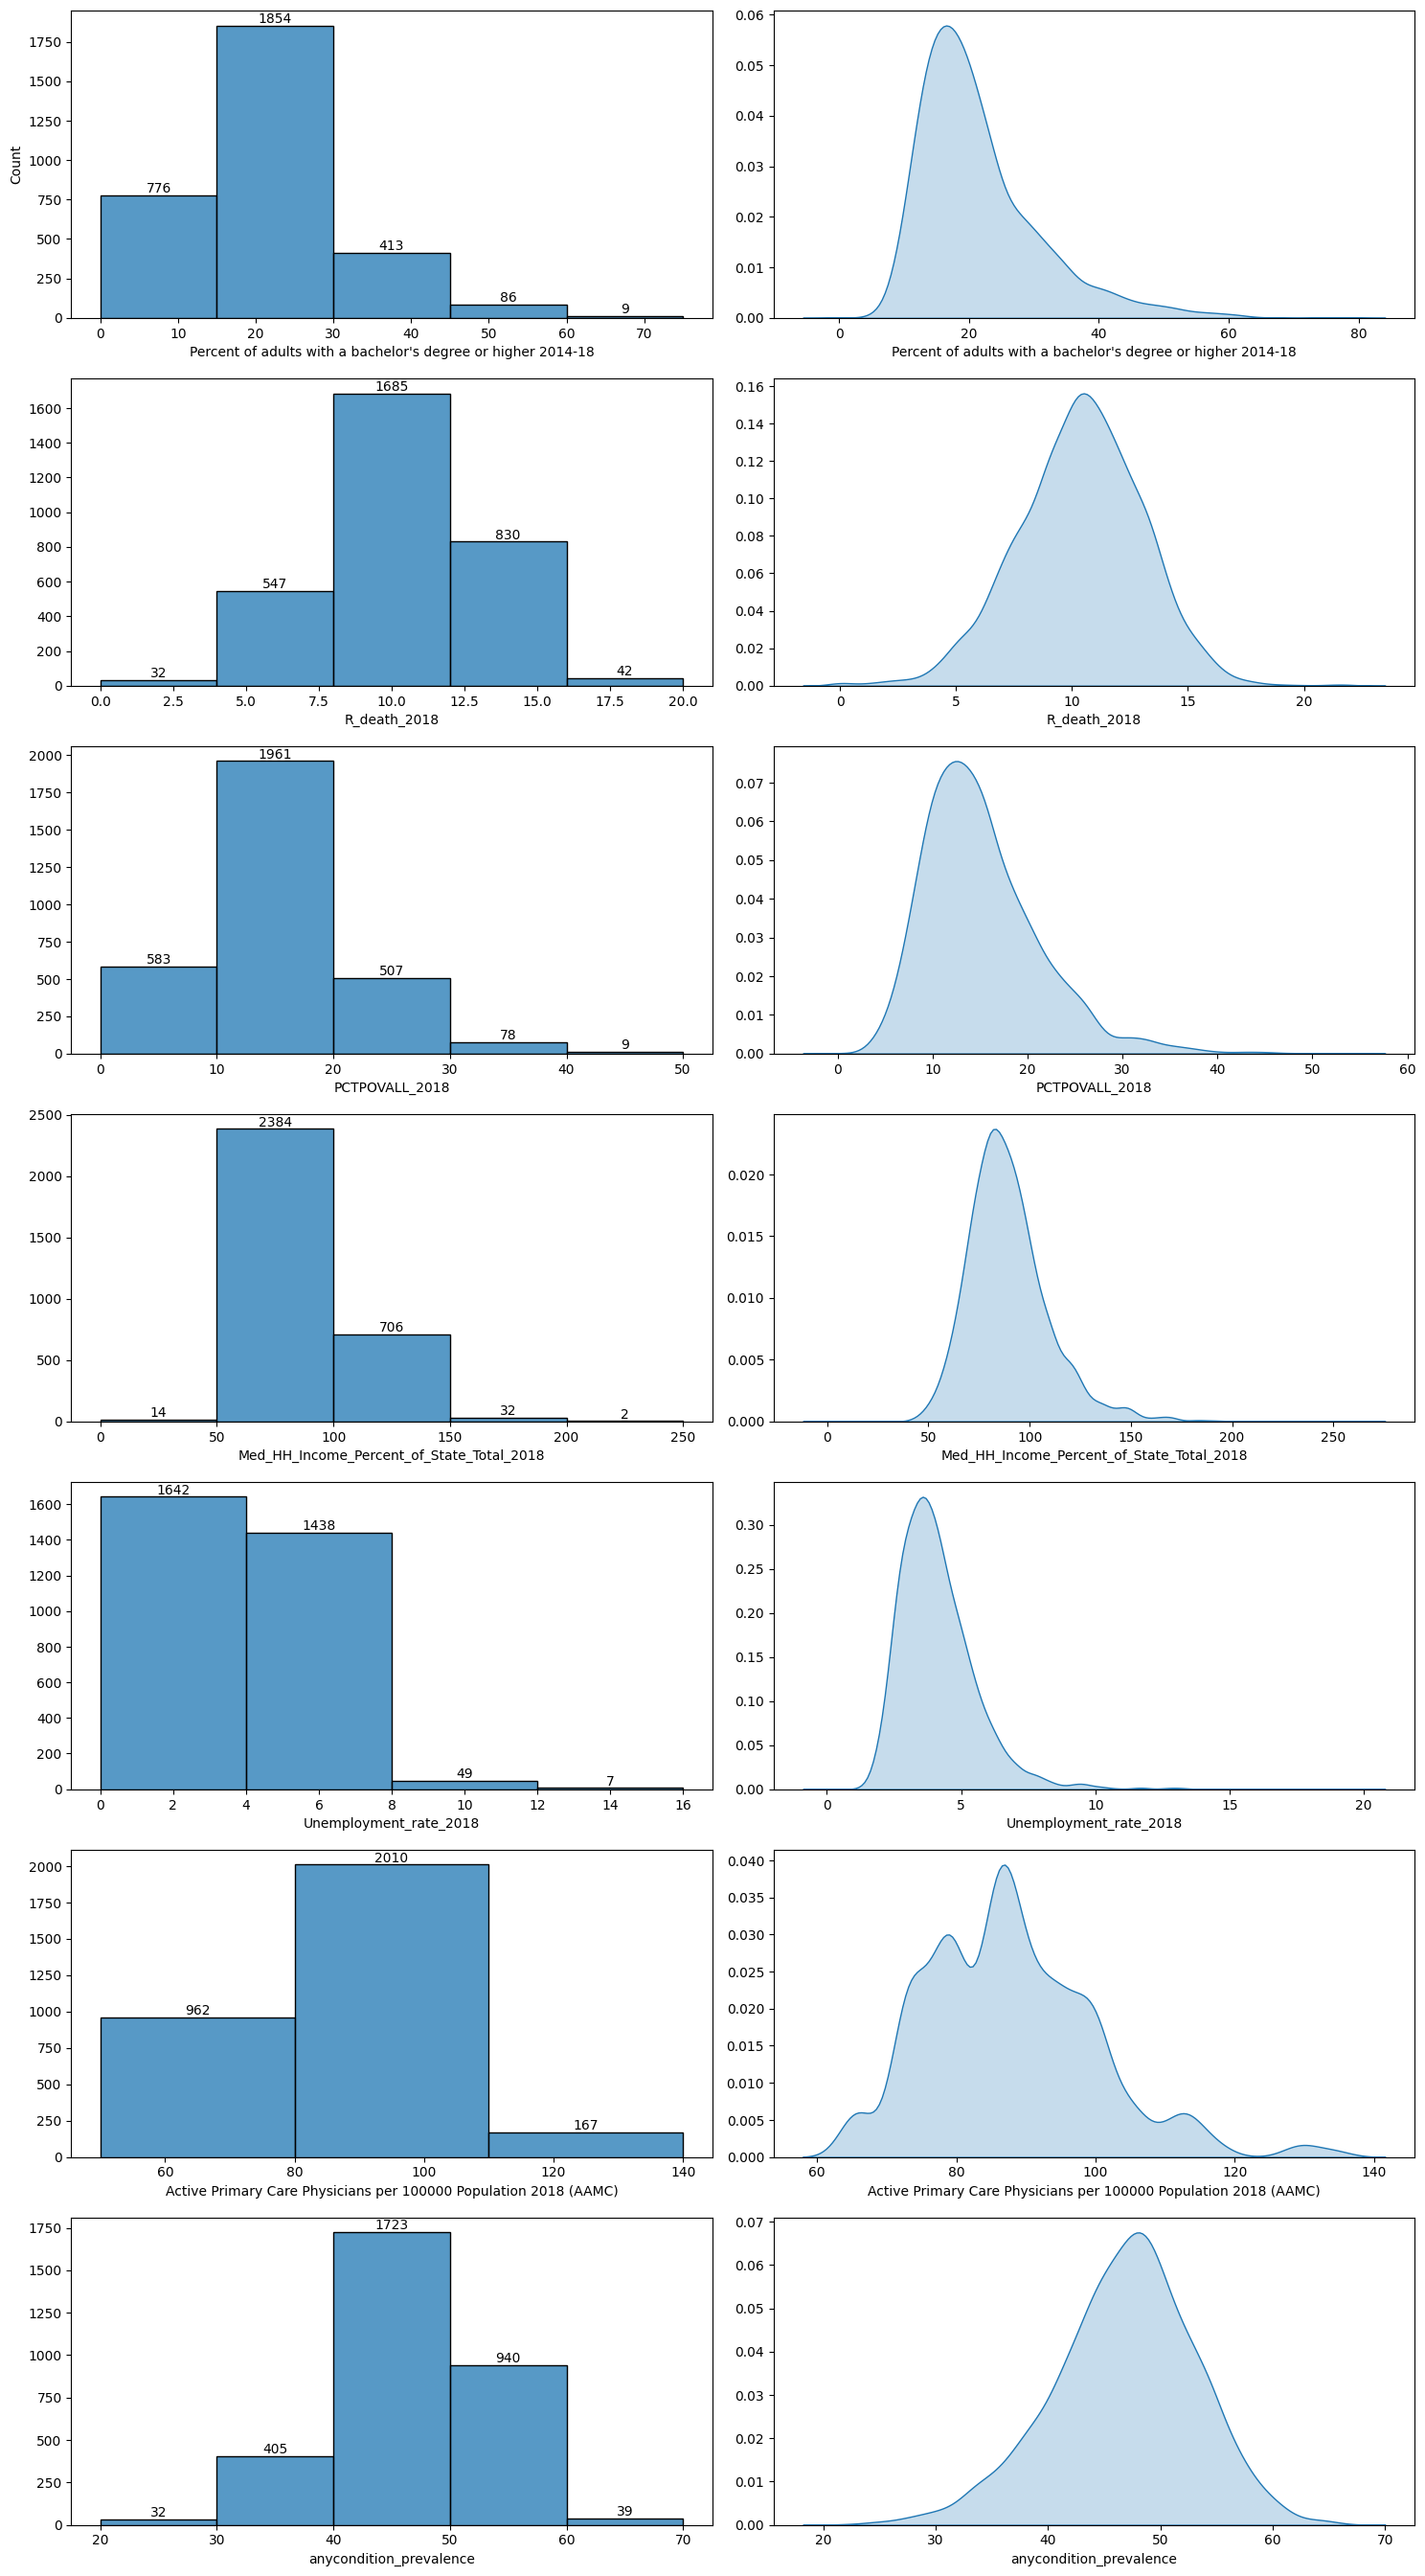

In [671]:
fig, axis = plt.subplots(7,2, figsize = (15, 27))

#sns.set_palette("Dark")
# Crear un histograma múltiple
sns.histplot(ax = axis[0,0], bins=(0,15,30,45,60,75), data = data_sel, x = "Percent of adults with a bachelor's degree or higher 2014-18")
axis[0,0].bar_label(axis[0,0].containers[0])
sns.kdeplot(ax = axis[0,1], data = data_s["Percent of adults with a bachelor's degree or higher 2014-18"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[1,0], bins=(0,4,8,12,16,20), data = data_sel, x = "R_death_2018").set(ylabel = None)
axis[1,0].bar_label(axis[1,0].containers[0])
sns.kdeplot(ax = axis[1,1], data = data_s["R_death_2018"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[2,0], bins=(0,10,20,30,40,50), data = data_sel, x = "PCTPOVALL_2018").set(ylabel = None)
axis[2,0].bar_label(axis[2,0].containers[0])
sns.kdeplot(ax = axis[2,1], data = data_s["PCTPOVALL_2018"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[3,0],bins=(0,50,100,150,200,250), data = data_sel, x = "Med_HH_Income_Percent_of_State_Total_2018").set(ylabel = None)
axis[3,0].bar_label(axis[3,0].containers[0])
sns.kdeplot(ax = axis[3,1], data = data_s["Med_HH_Income_Percent_of_State_Total_2018"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[4,0], bins=(0,4,8,12,16), data = data_sel, x = "Unemployment_rate_2018").set(ylabel = None)
axis[4,0].bar_label(axis[4,0].containers[0])
sns.kdeplot(ax = axis[4,1], data = data_s["Unemployment_rate_2018"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[5,0], bins=(50,80,110,140), data = data_sel, x='Active Primary Care Physicians per 100000 Population 2018 (AAMC)').set(ylabel = None)
axis[5,0].bar_label(axis[5,0].containers[0])
sns.kdeplot(ax = axis[5,1], data = data_s["Active Primary Care Physicians per 100000 Population 2018 (AAMC)"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[6,0], bins=(20,30,40,50,60,70), data = data_sel, x='anycondition_prevalence').set(ylabel = None)
axis[6,0].bar_label(axis[6,0].containers[0])
sns.kdeplot(ax = axis[6,1], data = data_s['anycondition_prevalence'],fill=True).set(ylabel = None)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


## Paso 4. Análisis de variables multivariante

Se va a comparar la variable objetivo **'anycondition_prevalence'** con las variables numericas predictoras: Percent of adults with a bachelor's degree or higher 2014-18","R_death_2018","PCTPOVALL_2018","Med_HH_Income_Percent_of_State_Total_2018", "Unemployment_rate_2018", "Active Primary Care Physicians per 100000 Population 2018 (AAMC)". 

**Principales conclusiones:**

- En todos los plots realizados de la variable objetivo versus las caracteristicas seleccionadas, se observa una relación clara entre ambas, en algunos casos la relacion es directa; es decir, sube la variable predictora y sube la variable objetivo, esto lo observamos con: R_death_2018 (tasa de mortalidad), PCTPOVALL_2018 (% de pobreza), Unemployment_rate_2018 (tasa de desempleo).

- Por el contrario cuando las siguientes características auumentan, la variable objetivo disminuye. Se anexan nombres: Percent of adults with a bachelor's degree or higher 2014-18, Med_HH_Income_Percent_of_State_Total_2018 y finalmente, Active Primary Care Physicians per 100000 Population 2018 (AAMC)".

- Estas relaciones directas e inversas se observan más marcadas en unas características que otras, por lo cual, en la matriz de correlación se determinaran de manera más clara la intensidad de las relaciones de las variables predictoras con el objetivo a predecir.


In [672]:
data_sel.columns.get_loc("Active Primary Care Physicians per 100000 Population 2018 (AAMC)")

5

In [673]:
data_sel.loc[:,'educ_range']=pd.cut(data_sel.loc[:,"Percent of adults with a bachelor's degree or higher 2014-18"],bins=[0,15,30,45,60,80],
                labels=['0-15 %','15-30 %','30-45 %','45-60 %','60-80 %'],include_lowest=True)

data_sel.loc[:,'death_range']=pd.cut(data_sel.loc[:,"R_death_2018"],bins=[0,4,8,12,16,22],
                labels=['0-4 %','4-8 %','8-12 %','12-16 %','16-22 %'],include_lowest=True)

data_sel.loc[:,'pobreza_range']=pd.cut(data_sel.loc[:,"PCTPOVALL_2018"],bins=[0,10,20,30,40,55],
                labels=['0-10 %','10-20 %','20-30 %','30-40 %','40-55 %'],include_lowest=True)

data_sel.loc[:,'income_range']=pd.cut(data_sel.iloc[:,3],bins=[0,50,100,150,200,265],
                labels=['0-50','50-100','100-150','150-200','200-265'],include_lowest=True)

data_sel.loc[:,'Unemp_range']=pd.cut(data_sel.loc[:,"Unemployment_rate_2018"],bins=[0,4,8,12,16,20],
                labels=['0-4','4-8','8-12','12-16','16-20'],include_lowest=True)

data_sel.loc[:,'Phys_range']=pd.cut(data_sel.iloc[:,5],bins=[50,80,110,140],
                labels=['50-80','80-110','110-140'],include_lowest=True)




In [674]:
data_s["Active Primary Care Physicians per 100000 Population 2018 (AAMC)"].describe()

count    3139.000000
mean       87.910417
std        12.274592
min        65.300000
25%        79.100000
50%        86.600000
75%        95.400000
max       134.300000
Name: Active Primary Care Physicians per 100000 Population 2018 (AAMC), dtype: float64

### Graficos Variable Clase Versus Predictoras

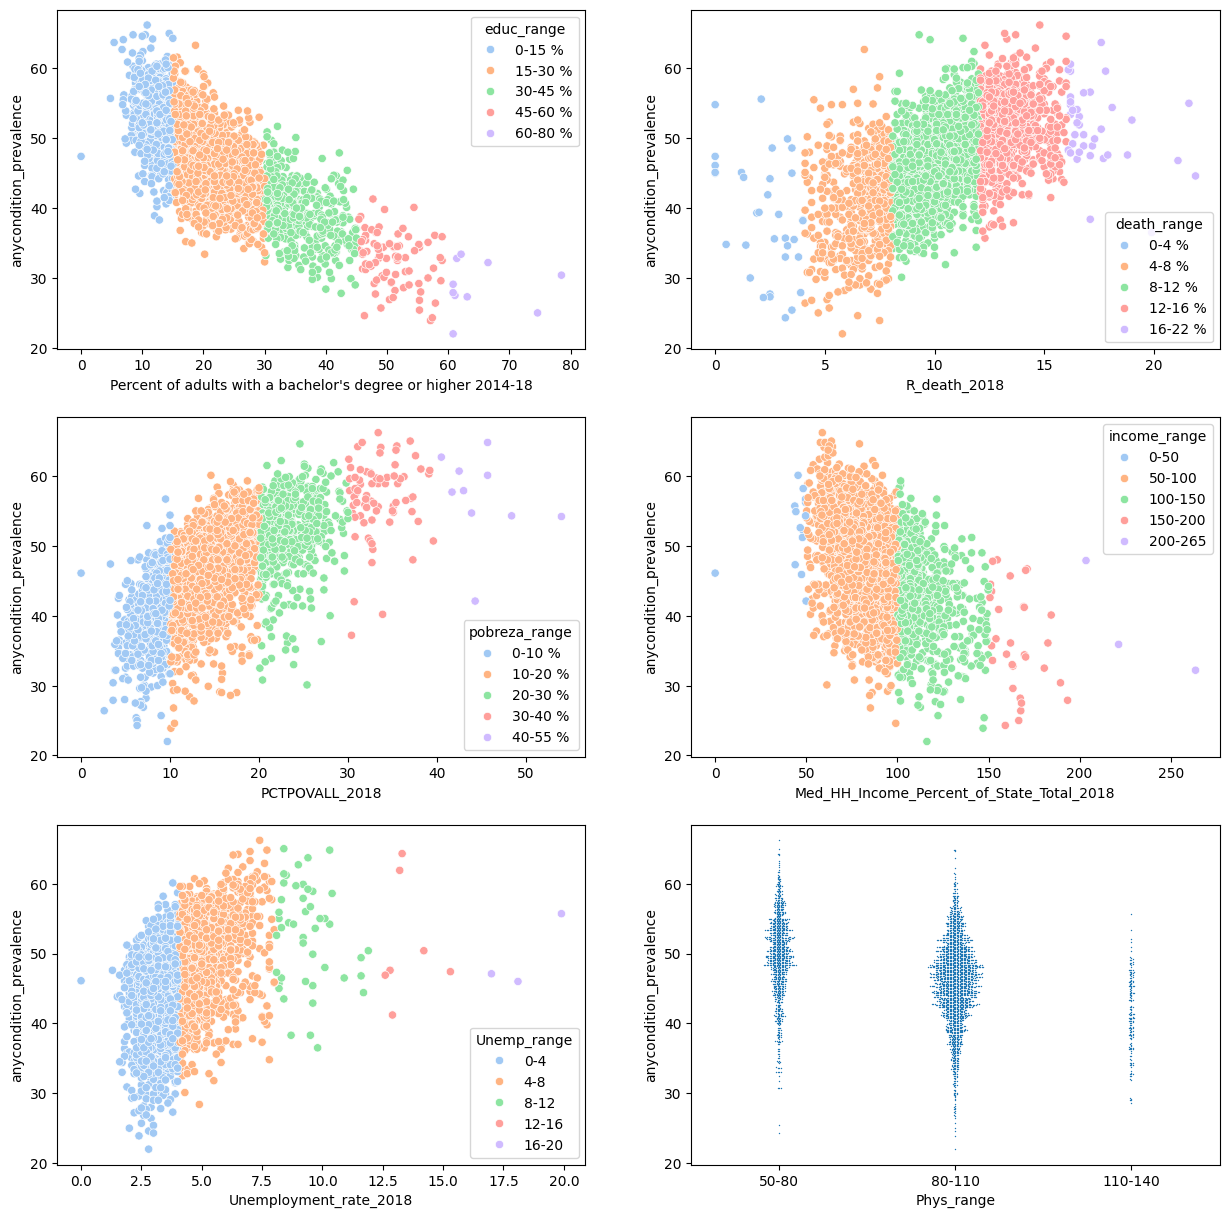

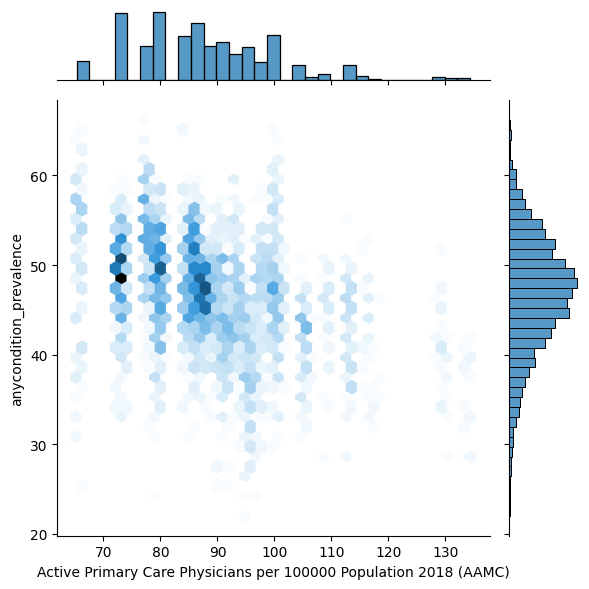

In [675]:
fig, axis = plt.subplots(3,2, figsize = (15, 15))

sns.scatterplot(ax = axis[0, 0], data = data_sel, y ='anycondition_prevalence', x="Percent of adults with a bachelor's degree or higher 2014-18", hue = "educ_range",palette='pastel')
sns.scatterplot(ax = axis[0, 1], data = data_sel, y = 'anycondition_prevalence',x='R_death_2018', hue = "death_range",palette='pastel')
sns.scatterplot(ax = axis[1, 0],data=data_sel,y='anycondition_prevalence',x='PCTPOVALL_2018', hue='pobreza_range',palette='pastel' )
sns.scatterplot(ax = axis[1,1],data=data_sel,y = 'anycondition_prevalence',x='Med_HH_Income_Percent_of_State_Total_2018',hue='income_range',palette='pastel' )
sns.scatterplot(ax = axis[2, 0],data=data_sel,y='anycondition_prevalence',x='Unemployment_rate_2018', hue='Unemp_range',palette='pastel' )
#sns.barplot(ax = axis[2,1],data=data_sel,y = 'anycondition_prevalence',x='Phys_range',hue='Phys_range',palette='pastel' )
sns.swarmplot(ax = axis[2,1],data=data_sel,y = 'anycondition_prevalence',x='Phys_range', size=1)
sns.jointplot(x=data_s['Active Primary Care Physicians per 100000 Population 2018 (AAMC)'], y=data_s['anycondition_prevalence'], kind="hex")

plt.tight_layout()
#fig.delaxes(axis[2,1])
#fig.delaxes(axis[2,2])

plt.show()

### Matriz de Correlacion

In [676]:
var_corr=["Percent of adults with a bachelor's degree or higher 2014-18","R_death_2018","PCTPOVALL_2018",
          "Med_HH_Income_Percent_of_State_Total_2018", "Unemployment_rate_2018",
          "Active Primary Care Physicians per 100000 Population 2018 (AAMC)","anycondition_prevalence"]
data_corr=data_s[var_corr]

In [677]:
data_corr.head()

,Percent of adults with a bachelor's degree or higher 2014-18,R_death_2018,PCTPOVALL_2018,Med_HH_Income_Percent_of_State_Total_2018,Unemployment_rate_2018,Active Primary Care Physicians per 100000 Population 2018 (AAMC),anycondition_prevalence
0,27.7,9.6,13.8,119.0,3.6,77.2,47.6
1,31.3,10.3,9.8,115.5,3.6,77.2,40.2
2,12.2,12.9,30.9,68.9,5.2,77.2,57.5
3,11.5,11.4,21.8,92.3,4.0,77.2,51.6
4,12.6,11.4,13.2,101.1,3.5,77.2,46.3


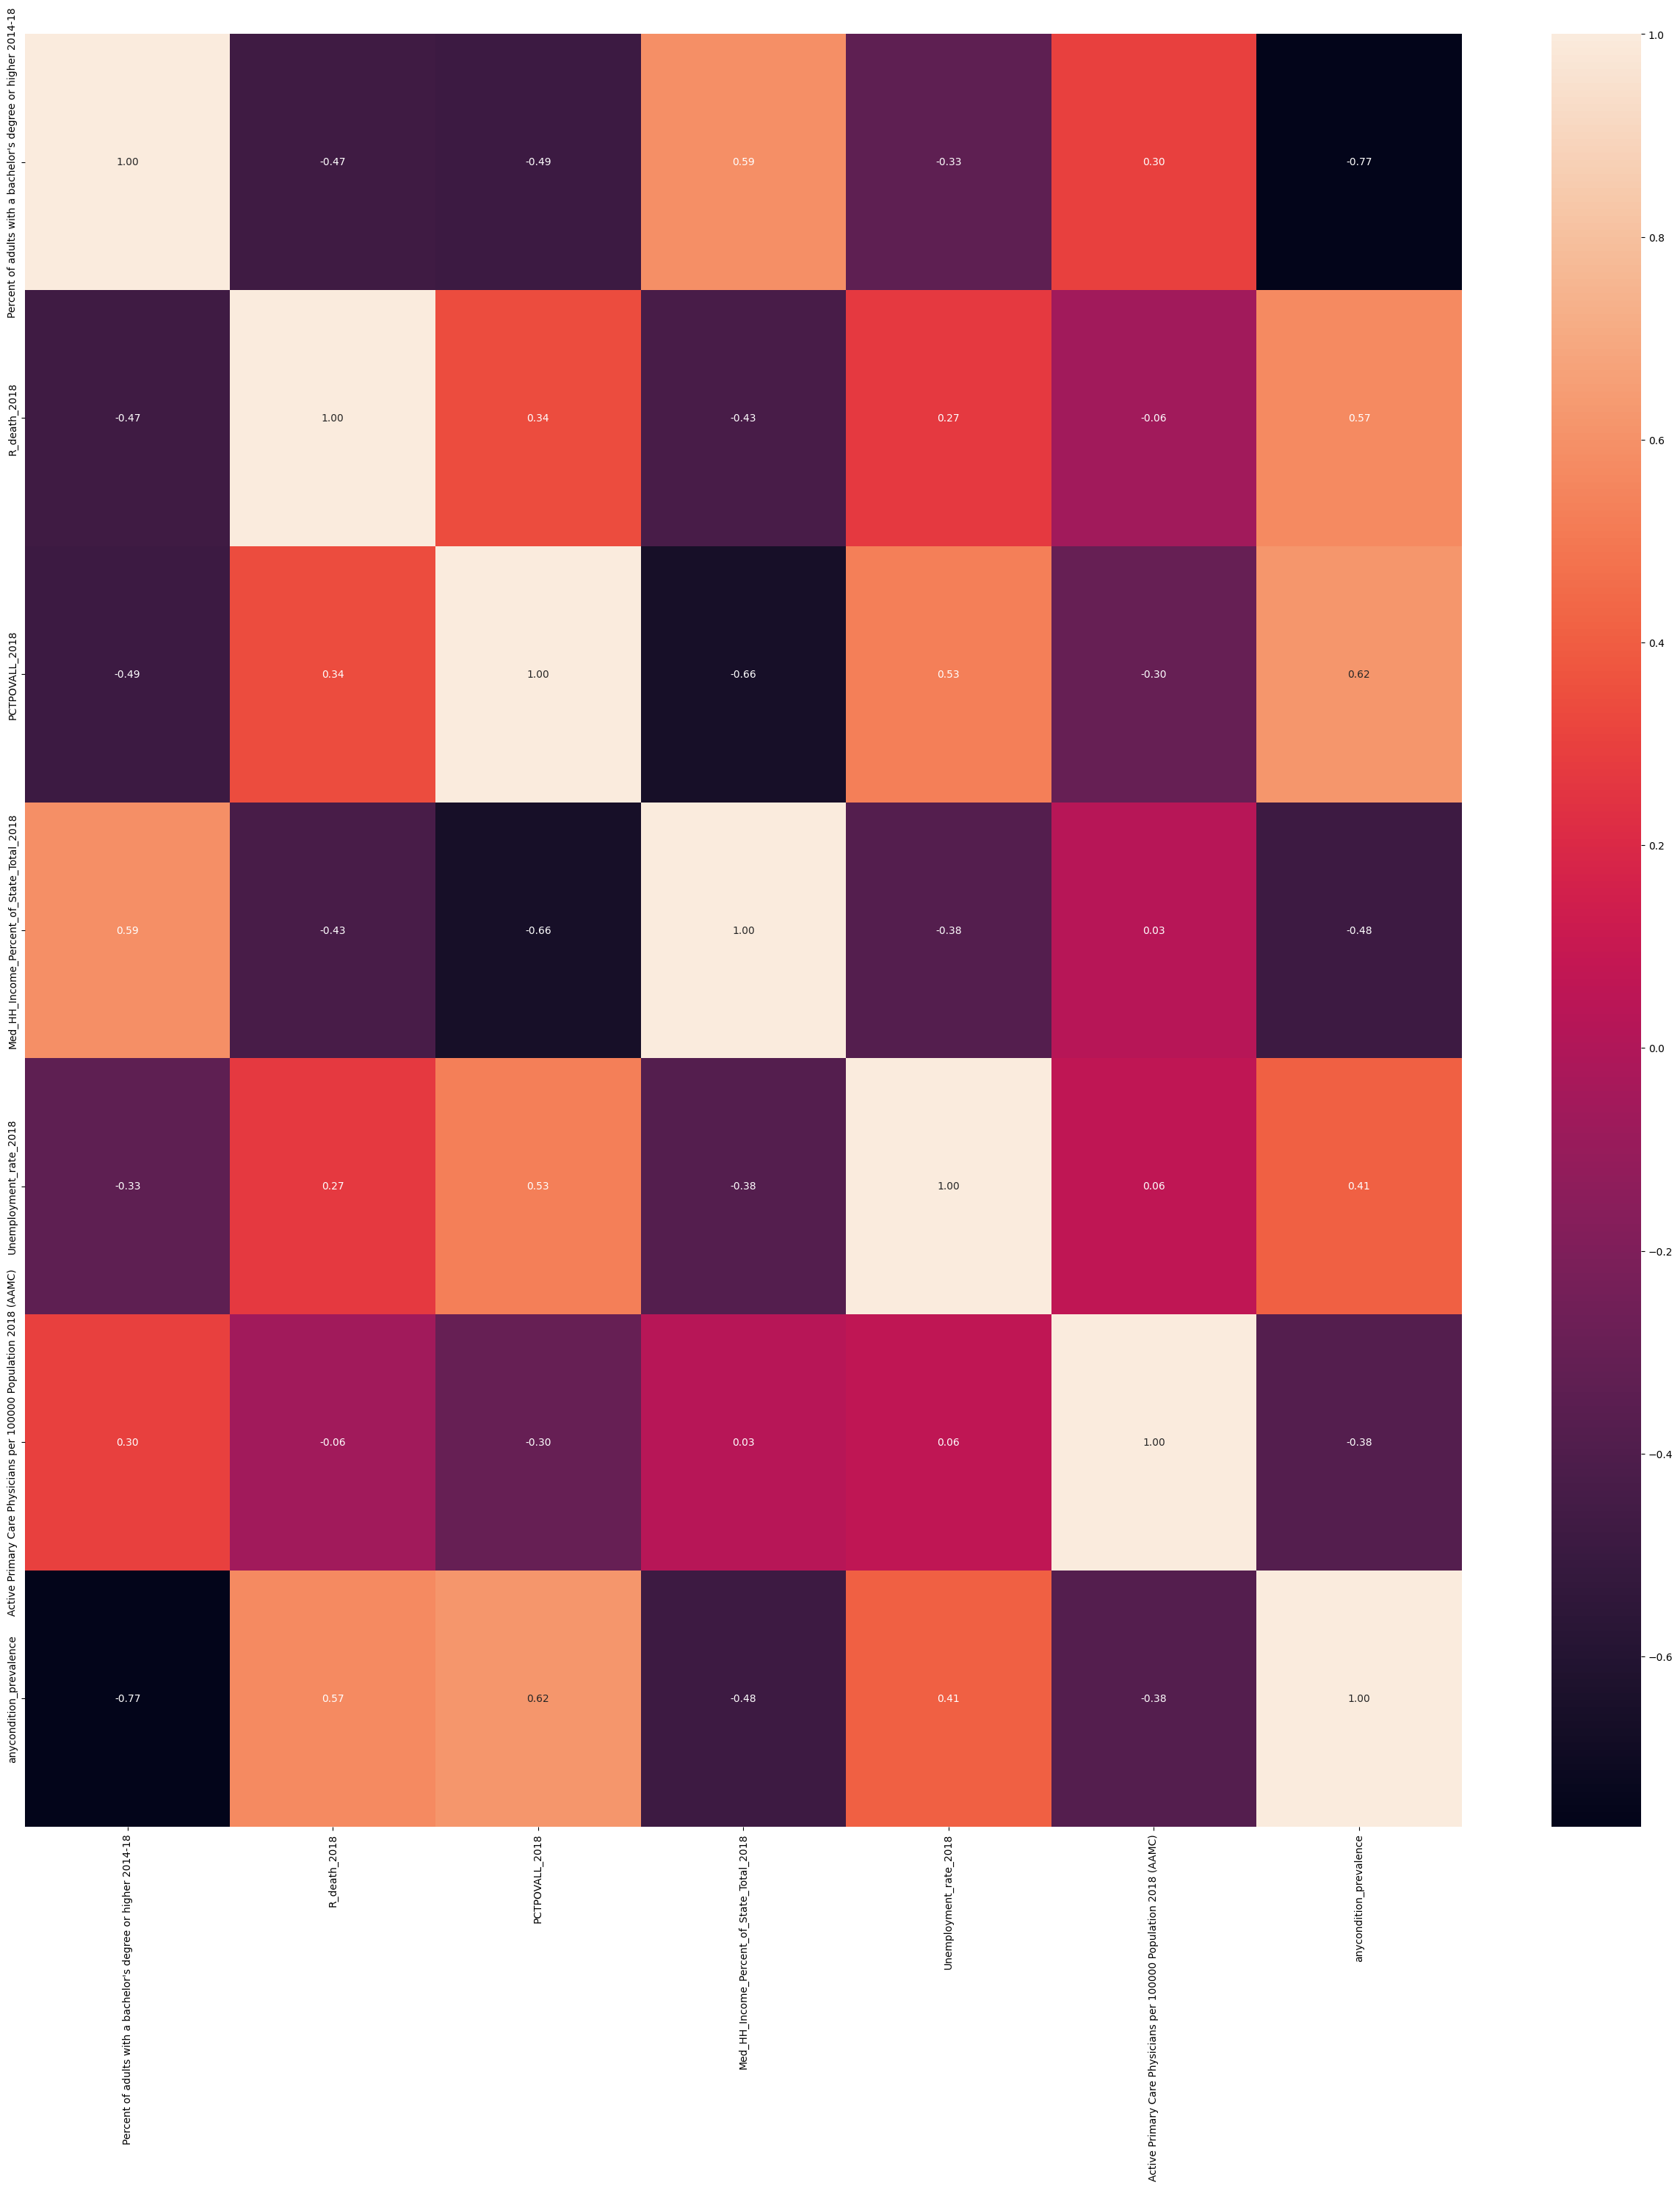

In [678]:
fig, axis = plt.subplots(figsize = (25,30))
matriz_corr=data_s[var_corr].corr()
#print(matriz_corr)
sns.heatmap(matriz_corr, annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

## Paso 5. Ingenieria de Características

Se estaran revisando valores atipicos para las variables: 

- Percent of adults with a bachelor's degree or higher 2014-18
- R_death_2018
- PCTPOVALL_2018
- Med_HH_Income_Percent_of_State_Total_2018
- Unemployment_rate_2018"
- Active Primary Care Physicians per 100000 Population 2018 (AAMC)
- anycondition_prevalence

### Graficos BoxPlots 

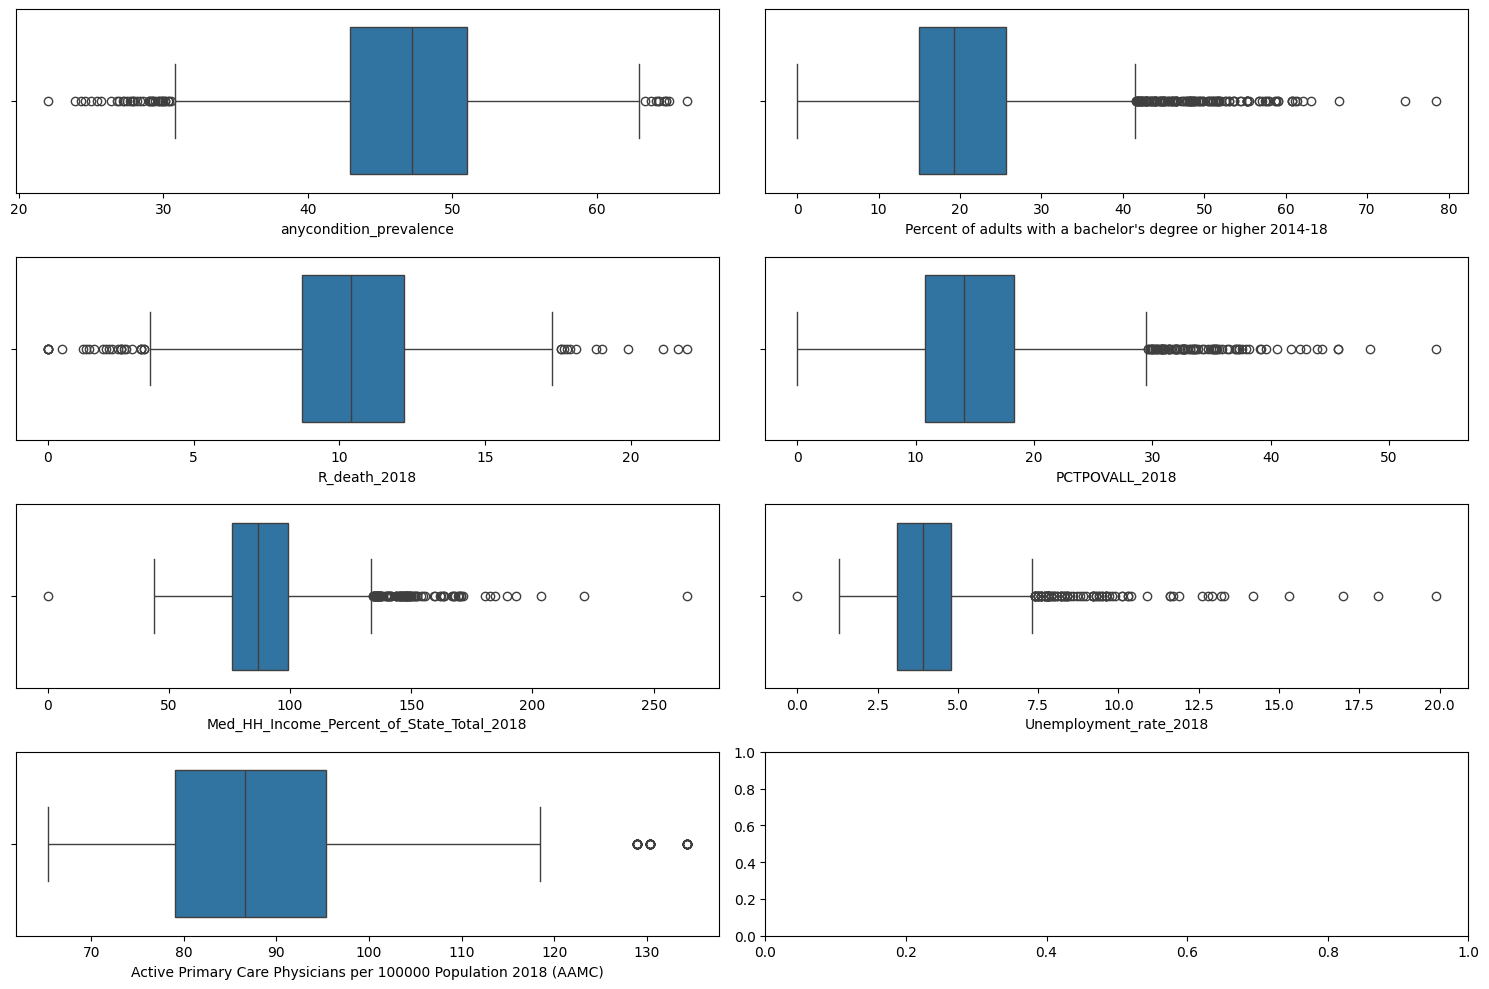

In [679]:
fig, axis = plt.subplots(4,2, figsize = (15, 10))

# Crear un histograma múltiple
sns.boxplot(ax = axis[0,0], data = data_corr, x = "anycondition_prevalence")
sns.boxplot(ax = axis[0,1], data = data_corr, x = "Percent of adults with a bachelor's degree or higher 2014-18")
sns.boxplot(ax = axis[1,0], data = data_corr, x = "R_death_2018")
sns.boxplot(ax = axis[1,1], data = data_corr, x = "PCTPOVALL_2018")
sns.boxplot(ax = axis[2,0], data = data_corr, x = "Med_HH_Income_Percent_of_State_Total_2018")
sns.boxplot(ax = axis[2,1], data = data_corr, x = "Unemployment_rate_2018")
sns.boxplot(ax = axis[3,0], data = data_corr, x = "Active Primary Care Physicians per 100000 Population 2018 (AAMC)")


# Ajustar el layout
plt.tight_layout()
# Mostrar el plot
plt.show()


In [680]:
data_corr.columns

Index(['Percent of adults with a bachelor's degree or higher 2014-18',
       'R_death_2018', 'PCTPOVALL_2018',
       'Med_HH_Income_Percent_of_State_Total_2018', 'Unemployment_rate_2018',
       'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
       'anycondition_prevalence'],
      dtype='object')

### Valores atípicos

- **Percent of adults with a bachelor's degree or higher 2014-18.** No existe información relevante para excluir valores por encima de 41.5.

- **R_death_2018.** Se procedio a eliminiar los valores iguales a cero (la tasa de mortalidad con valor cero es muy ideal) y los sugeridos por encima del limite superior de 17.45, los cuales representaron una proporcion muy baja y estan en la cola derecha de la distribucion de los valores.

- **PCTPOVALL_2018.** Se procedio a eliminar los valores de la cola por encima de 40%, el limite sup sugerido fue de 29.55%, pero se dejaban muchos valores por fuera. 

- **Med_HH_Income_Percent_of_State_Total_2018.** No se elimina ningun valor sugerido por los limites sup e inf, esta variable puede tener algunas variaciones importantes dentro del rango de datos.

- **Active Primary Care Physicians per 100000 Population 2018 (AAMC).** Se eliminan los valores de la cola derecha por encima de 120, lo cual fue sugerido por el lim sup, en relacion al lim inf, no existe ningun valor por debajo del calculo realizado por los cuartiles. 

- **anycondition_prevalence.** No hay suficente informacion para eliminar los valores sugeridos por los limites inferior y superior.


In [681]:
educ=data_corr["Percent of adults with a bachelor's degree or higher 2014-18"].describe()
educ_iqr=educ['75%']-educ['25%']
p_lim_sup=educ['75%']+1.5*educ_iqr
p_lim_inf=educ['25%']-1.5*educ_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(educ_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 41.5 y -0.9, con un rango intercuartílico de 10.6


In [682]:
mort=data_corr["R_death_2018"].describe()
mort_iqr=mort['75%']-mort['25%']
p_lim_sup=mort['75%']+1.5*mort_iqr
p_lim_inf=mort['25%']-1.5*mort_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(mort_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 17.45 y 3.45, con un rango intercuartílico de 3.5


In [683]:
pobr=data_corr["PCTPOVALL_2018"].describe()
pobr_iqr=pobr['75%']-pobr['25%']
p_lim_sup=pobr['75%']+1.5*pobr_iqr
p_lim_inf=pobr['25%']-1.5*pobr_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(pobr_iqr, 2)}")


Los límites superior e inferior para la búsqueda de outliers son 29.55 y -0.45, con un rango intercuartílico de 7.5


In [684]:
ingr=data_corr["Med_HH_Income_Percent_of_State_Total_2018"].describe()
ingr_iqr=ingr['75%']-ingr['25%']
p_lim_sup=ingr['75%']+1.5*ingr_iqr
p_lim_inf=ingr['25%']-1.5*ingr_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(ingr_iqr, 2)}")



Los límites superior e inferior para la búsqueda de outliers son 133.7 y 41.7, con un rango intercuartílico de 23.0


In [685]:
phys=data_corr["Active Primary Care Physicians per 100000 Population 2018 (AAMC)"].describe()
phys_iqr=phys['75%']-phys['25%']
p_lim_sup=phys['75%']+1.5*phys_iqr
p_lim_inf=phys['25%']-1.5*phys_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(phys_iqr, 2)}")


Los límites superior e inferior para la búsqueda de outliers son 119.85 y 54.65, con un rango intercuartílico de 16.3


In [686]:
anyc=data_corr["anycondition_prevalence"].describe()
anyc_iqr=anyc['75%']-anyc['25%']
p_lim_sup=anyc['75%']+1.5*anyc_iqr
p_lim_inf=anyc['25%']-1.5*anyc_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(anyc_iqr, 2)}")


Los límites superior e inferior para la búsqueda de outliers son 63.15 y 30.75, con un rango intercuartílico de 8.1


In [687]:
data_corr.loc[data_corr["anycondition_prevalence"]<30.75].count()

Percent of adults with a bachelor's degree or higher 2014-18        38
R_death_2018                                                        38
PCTPOVALL_2018                                                      38
Med_HH_Income_Percent_of_State_Total_2018                           38
Unemployment_rate_2018                                              38
Active Primary Care Physicians per 100000 Population 2018 (AAMC)    38
anycondition_prevalence                                             38
dtype: int64

In [688]:
data_corr.drop(data_corr[data_corr["R_death_2018"]==0].index,inplace=True)
data_corr.drop(data_corr[data_corr["R_death_2018"]>17.45].index,inplace=True)
data_corr.drop(data_corr[data_corr["PCTPOVALL_2018"]>40].index,inplace=True)
data_corr.drop(data_corr[data_corr["Active Primary Care Physicians per 100000 Population 2018 (AAMC)"]>120].index,inplace=True)


### Split Data Train y Test

In [689]:
from sklearn.model_selection import train_test_split
var_num=["Percent of adults with a bachelor's degree or higher 2014-18","R_death_2018","PCTPOVALL_2018",
          "Med_HH_Income_Percent_of_State_Total_2018", "Unemployment_rate_2018",
          "Active Primary Care Physicians per 100000 Population 2018 (AAMC)"]
# Dividimos el conjunto de datos en muestras de train y test
X = data_corr.drop("anycondition_prevalence", axis = 1)[var_num]
y = data_corr["anycondition_prevalence"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Percent of adults with a bachelor's degree or higher 2014-18,R_death_2018,PCTPOVALL_2018,Med_HH_Income_Percent_of_State_Total_2018,Unemployment_rate_2018,Active Primary Care Physicians per 100000 Population 2018 (AAMC)
2378,23.6,10.0,9.1,97.1,4.4,92.8
2103,14.1,9.8,10.3,95.9,4.1,93.7
1422,22.3,9.5,20.0,101.4,4.5,65.9
359,33.0,12.7,10.7,111.1,3.5,86.8
2548,14.8,8.0,14.1,86.7,3.6,72.9


### Escalado de Data Train y Test

In [690]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = var_num)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = var_num)

X_train_scal.head()

,Percent of adults with a bachelor's degree or higher 2014-18,R_death_2018,PCTPOVALL_2018,Med_HH_Income_Percent_of_State_Total_2018,Unemployment_rate_2018,Active Primary Care Physicians per 100000 Population 2018 (AAMC)
2378,0.255088,0.546584,0.152778,0.242838,0.166667,0.516917
2103,0.126187,0.534161,0.186111,0.237381,0.150538,0.533835
1422,0.237449,0.515528,0.455556,0.262392,0.172043,0.011278
359,0.382632,0.714286,0.197222,0.306503,0.118280,0.404135
2548,0.135685,0.422360,0.291667,0.195543,0.123656,0.142857


## Paso 5. Inicialización y entrenamiento del modelo

In [691]:
model = LinearRegression()
model.fit(X_train_scal, y_train)

LinearRegression()

In [692]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2, b3, b4, b5, b6): {model.coef_}")

Intercepto (a): 40.316860115554086
Coeficientes (b1, b2, b3, b4, b5, b6): [-27.30106186  10.83189343  12.56037871  14.73982412   5.03433563
  -3.21545118]


## Paso 6: Predicción del modelo

In [693]:
y_pred = model.predict(X_test_scal)
y_pred

array([50.00674214, 42.20754064, 49.74780214, 49.66673559, 46.77625281,
       48.46851625, 45.12514759, 45.40809762, 50.34523481, 46.2463282 ,
       49.6655968 , 32.84392994, 47.77055898, 48.75112109, 45.4889449 ,
       50.36668764, 46.71385805, 49.11354451, 53.83931169, 48.18920957,
       53.75616124, 52.9399736 , 51.19735042, 52.19648184, 47.65055291,
       29.17441851, 43.60461117, 46.81622485, 51.20590789, 53.82829273,
       47.64563722, 45.48866726, 52.35115882, 43.9454805 , 32.30120398,
       58.10203128, 45.60116858, 53.92689415, 42.79203879, 40.5903633 ,
       48.17976498, 39.22728676, 52.5606489 , 50.46165272, 52.94460238,
       42.22521337, 45.09047748, 51.15959401, 53.20475982, 54.92072545,
       47.31795899, 56.6887424 , 44.78842843, 41.88997707, 46.06159483,
       51.16367002, 57.45068154, 42.77751136, 47.29306406, 48.74439777,
       50.56299491, 56.83082462, 41.1096541 , 36.99156255, 45.99125505,
       54.80905838, 47.16922774, 51.21293581, 52.1766323 , 36.03

In [694]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 9.694471253750834
Coeficiente de determinación: 0.7672155706097952


### Optimización del modelo.

#### Iterando sobre el algoritmo de Lasso para encontrar un alpha adecuado.

Resultado: No se logro optimar el resultado original con Coeficiente de determinación: 0.7672155706097952. Se preciso que el alpha mas pequeño nos acerca a mejores resultados, por ejemplo: 0.01, 0.0001, 0.00001. Se deja fijo max_iter en 100. Se realizo un grafico para validar estrategia de optimización.

In [695]:
def mod_lasso(alpha):
    lasso_model = Lasso(alpha = alpha, max_iter = 100, random_state=42)
    lasso_model.fit(X_train_scal, y_train)
    y_predlasso = lasso_model.predict(X_test_scal)
    return y_predlasso

In [696]:
results={}
for j in np.arange(0.0,0.1,0.001,dtype=float):
    j = round(j, 7)
    results[j]=r2_score(y_test, mod_lasso(j))
    print(f"alpha, Coeficiente de determinación: {j, r2_score(y_test, mod_lasso(j))}")

alpha, Coeficiente de determinación: (0.0, 0.7672155706097952)
alpha, Coeficiente de determinación: (0.001, 0.7670229572172707)
alpha, Coeficiente de determinación: (0.002, 0.7667904394201339)
alpha, Coeficiente de determinación: (0.003, 0.7665206671870354)
alpha, Coeficiente de determinación: (0.004, 0.7662129984011186)
alpha, Coeficiente de determinación: (0.005, 0.7658674330623834)
alpha, Coeficiente de determinación: (0.006, 0.7654839711708296)
alpha, Coeficiente de determinación: (0.007, 0.7650626127264574)
alpha, Coeficiente de determinación: (0.008, 0.7646033577292668)
alpha, Coeficiente de determinación: (0.009, 0.7641062061792576)
alpha, Coeficiente de determinación: (0.01, 0.7635711580764302)
alpha, Coeficiente de determinación: (0.011, 0.7629982134207843)
alpha, Coeficiente de determinación: (0.012, 0.76238737221232)
alpha, Coeficiente de determinación: (0.013, 0.7617386344510372)
alpha, Coeficiente de determinación: (0.014, 0.761052000136936)
alpha, Coeficiente de determina

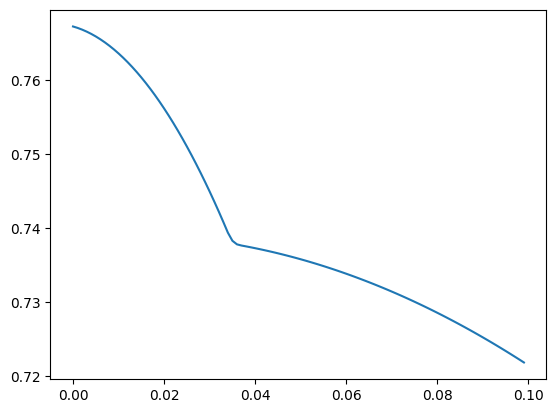

In [697]:
plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [698]:
valor =0.765
for key, value in results.items():
    if value > valor:
        print(f"Key: {key}, Value: {value}")

Key: 0.0, Value: 0.7672155706097952
Key: 0.001, Value: 0.7670229572172707
Key: 0.002, Value: 0.7667904394201339
Key: 0.003, Value: 0.7665206671870354
Key: 0.004, Value: 0.7662129984011186
Key: 0.005, Value: 0.7658674330623834
Key: 0.006, Value: 0.7654839711708296
Key: 0.007, Value: 0.7650626127264574


#### Aplicacion de Grid_Search.

Resultado: No se logro optimar el resultado original con Coeficiente de determinación: 0.7672155706097952. Se preciso que el alpha mas pequeño nos acerca a mejores resultados, por ejemplo: 0.01, 0.0001, 0.00001. Con esta técnica se movio el parámetro max_iter entre 100,500,1000. Finalmente, se anexa gráfico con la importancia de las características en el modelo de Lasso.

In [699]:
# Define el modelo de regresión lineal múltiple con Lasso
lasso_model = Lasso()

# Define los parámetros a optimizar
param_grid = {
    'alpha': [0.00001, 0.01, 0.1],  # valor de la penalización L1
    'max_iter': [100, 500, 1000]  # número de iteraciones
}

# Crea un objeto GridSearchCV
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Entrena el modelo con GridSearchCV
grid_search.fit(X_train_scal, y_train)

# Imprime los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Imprime la mejor puntuación (negativa del error cuadrático medio)
print("Mejor puntuación:", grid_search.best_score_)

# Utiliza los mejores parámetros para entrenar el modelo final
best_model = grid_search.best_estimator_
best_model.fit(X_train_scal, y_train)

# Evalúa el modelo final en el conjunto de prueba
#y_predl = best_model.predict(X_test_scal)
#print(f"Error cuadrático medio: {mean_squared_error(y_test, y_predl)}")

Mejores parámetros: {'alpha': 1e-05, 'max_iter': 100}
Mejor puntuación: -10.35876136227905


Lasso(alpha=1e-05, max_iter=100)

In [700]:
lasso_model = Lasso(alpha = 0.00001, max_iter = 100, random_state=42)
lasso_model.fit(X_train_scal, y_train)
y_predlasso = lasso_model.predict(X_test_scal)
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_predlasso)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_predlasso)}")


Error cuadrático medio: 9.694543113354722
Coeficiente de determinación: 0.767213845111163


[27.29968235 10.83147432 12.55941271 14.73558428  5.03291555  3.21560875]


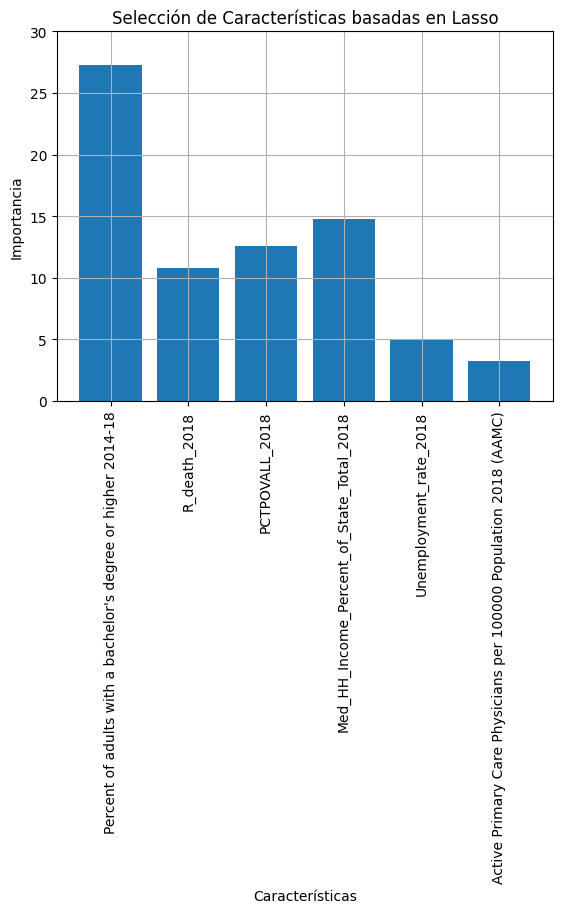

In [701]:
# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso_model.coef_)
print(lasso1_coef)
# plotting the Column Names and Importance of Columns. 
plt.bar(var_num, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Selección de Características basadas en Lasso")
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.ylim(0, 30)
plt.show()